In [112]:
# Assigment 5
# 

# Initialisation of libraries 
import numpy as np
import matplotlib.pyplot as plt

In [113]:
def gnerate_vel_and_ac(exp, var, T, V0, numb):
    arr = np.zeros(numb)
    a = np.random.normal(exp, var ** 0.5, numb)
    arr[0] = V0
    for i in range(1, len(arr)):
        arr[i] = arr[i - 1] + a[i - 1] * T
    return arr, a
def generate_x(T, X0, a, v):
    arr = np.zeros(len(a))
    arr[0] = X0
    for i in range(1, len(a)):
        arr[i] = arr[i - 1] + v[i - 1] * T + a[i - 1] * (T ** 2) / 2
    return arr
def kalman_filt(z, X0, P0, F, Q, R, H):
    
    arr = np.zeros([200, 2])
    P = np.zeros([200, 2 , 2])
    K = np.zeros([200, 2])
    arr[0] = X0
    P[0] = P0
    
    for i in range(1, len(X)):
        arr[i] = np.dot(F, arr[i - 1].reshape(2, 1)).reshape(1, 2)
        P[i] = np.dot(np.dot(F, P[i - 1]), F.transpose()) + Q

        K[i] = (P[i].dot(H.reshape(2, 1))).dot((((H.reshape(1,2)).dot(P[i])).dot(H.reshape(2, 1)) + R) ** (-1)).reshape(1, 2)

        arr[i] = arr[i] + K[i] * (z[i] - np.dot(H, arr[i]))
        P[i] = (np.identity(2) - (K[i].reshape(2,1)).dot(H.reshape(1,2))).dot(P[i])
        
    return arr, P, K

def kalman_filt_x(z, X0, P0, F, Q, R, H):
    
    arr = np.zeros([200, 2])
    P = np.zeros([200, 2 , 2])
    K = np.zeros([200, 2])
    arr[0] = X0
    P[0] = P0
    
    for i in range(1, len(X)):
        arr[i] = np.dot(F, arr[i - 1].reshape(2, 1)).reshape(1, 2)
        P[i] = np.dot(np.dot(F, P[i - 1]), F.transpose()) + Q

        K[i] = (P[i].dot(H.reshape(2, 1))).dot((((H.reshape(1,2)).dot(P[i])).dot(H.reshape(2, 1)) + R) ** (-1)).reshape(1, 2)

        arr[i] = arr[i] + K[i] * (z[i] - np.dot(H, arr[i]))
        P[i] = (np.identity(2) - (K[i].reshape(2,1)).dot(H.reshape(1,2))).dot(P[i])
        
    return arr[:,0]
def extrapol(x, m, F):
    return (np.linalg.matrix_power(F, m)).dot(x)
        

In [114]:
# PART 1
x0 = 5
v0 = 1
T = 1
sigmaa_2 = 0.2 ** 2
numb = 200
v,a = gnerate_vel_and_ac(0, sigmaa_2 ** 0.5, T, v0, numb)
x = generate_x(T, x0, a, v)

In [115]:
sigmaeta_2 = 20 ** 2
eta = np.random.normal(0, sigmaeta_2 ** 0.5, 200)
z = x + eta

In [116]:
F = np.array([[1, T], [0, 1]])
G = np.array([T ** 2 / 2, T])
H = np.array([1, 0])

In [117]:
X = np.zeros([200, 2])
X[0] = np.array([x[0], v[0]])
for i in range(1, len(X)):
    X[i] = np.dot(F, X[i - 1]) + np.dot(G, a[i - 1])

In [118]:
for i in range(len(x)):
    z[i] = np.dot(H, X[i]) + eta[i]

In [119]:
# X_pred = np.zeros([200, 2])
# X_pred[0] = np.array([2, 0])
# P_pred = np.zeros([200, 2, 2])
Q = np.dot(np.dot(G, G.transpose()), sigmaa_2)
R = sigmaeta_2
X0 = np.array([2, 0])
P0 = np.array([[10000, 0], [0, 10000]])

X_filt, P, K = kalman_filt(z, X0, P0, F, Q, R, H)
# X_filt = np.zeros([200, 2])
# P = np.zeros([200, 2 , 2])
# K = np.zeros([200, 2])

# X_filt[0] = np.array([2, 0])


# P[0] = np.array([[10000, 0], [0, 10000]])

# for i in range(1, len(X)):
#     X_filt[i] = np.dot(F, X_filt[i - 1].reshape(2, 1)).reshape(1, 2)
#     P[i] = np.dot(np.dot(F, P[i - 1]), F.transpose()) + Q
    
#     K[i] = (P[i].dot(H.reshape(2, 1))).dot((((H.reshape(1,2)).dot(P[i])).dot(H.reshape(2, 1)) + R) ** (-1)).reshape(1, 2)
    
#     X_filt[i] = X_filt[i] + K[i] * (z[i] - np.dot(H, X_filt[i]))
#     P[i] = (np.identity(2) - (K[i].reshape(2,1)).dot(H.reshape(1,2))).dot(P[i])


/var/folders/9y/cbn__xb93h3710lq08dsvk9r0000gn/T/ipykernel_7992/3218482949.py:26: RuntimeWarning: invalid value encountered in reciprocal
  K[i] = (P[i].dot(H.reshape(2, 1))).dot((((H.reshape(1,2)).dot(P[i])).dot(H.reshape(2, 1)) + R) ** (-1)).reshape(1, 2)


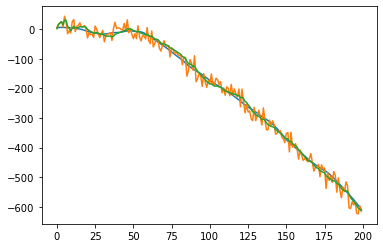

In [120]:
plt.plot(X[:,0])
plt.plot(z)
plt.plot(X_filt[:,0])

/var/folders/9y/cbn__xb93h3710lq08dsvk9r0000gn/T/ipykernel_7992/3218482949.py:45: RuntimeWarning: invalid value encountered in reciprocal
  K[i] = (P[i].dot(H.reshape(2, 1))).dot((((H.reshape(1,2)).dot(P[i])).dot(H.reshape(2, 1)) + R) ** (-1)).reshape(1, 2)
/var/folders/9y/cbn__xb93h3710lq08dsvk9r0000gn/T/ipykernel_7992/3218482949.py:45: RuntimeWarning: invalid value encountered in reciprocal
  K[i] = (P[i].dot(H.reshape(2, 1))).dot((((H.reshape(1,2)).dot(P[i])).dot(H.reshape(2, 1)) + R) ** (-1)).reshape(1, 2)
/var/folders/9y/cbn__xb93h3710lq08dsvk9r0000gn/T/ipykernel_7992/3218482949.py:45: RuntimeWarning: invalid value encountered in reciprocal
  K[i] = (P[i].dot(H.reshape(2, 1))).dot((((H.reshape(1,2)).dot(P[i])).dot(H.reshape(2, 1)) + R) ** (-1)).reshape(1, 2)


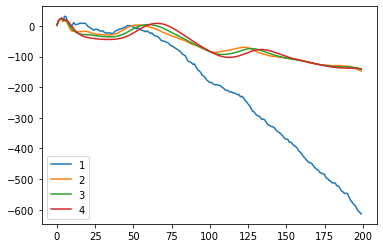

In [121]:
plt.plot(X_filt[:,0])
plt.plot(kalman_filt_x(X_filt, X0, P0, F, Q, R, H))
plt.plot(kalman_filt_x(kalman_filt_x(X_filt, X0, P0, F, Q, R, H), X0, P0, F, Q, R, H))
plt.plot(kalman_filt_x(kalman_filt_x(kalman_filt_x(X_filt, X0, P0, F, Q, R, H), X0, P0, F, Q, R, H), X0, P0, F, Q, R, H))
plt.legend(["1", "2", "3", "4"])

0.13895150388783034

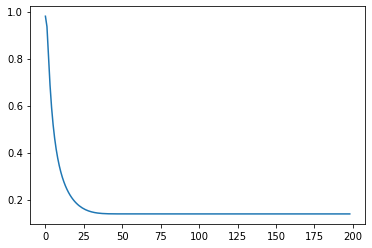

In [122]:
plt.plot(K[1:, 0])
min(K[1:, 0])

55.580601555132134

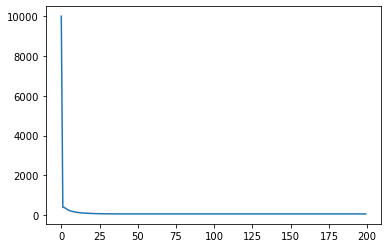

In [123]:
plt.plot(P[:,0,0])
min(P[:,0,0])

In [167]:
m = 7
X_extrapol = np.zeros([200, 2])
for i in range(m - 1,len(X_filt)):
    X_extrapol[i] = extrapol(X_filt[:,:][i - m + 1], m, F)

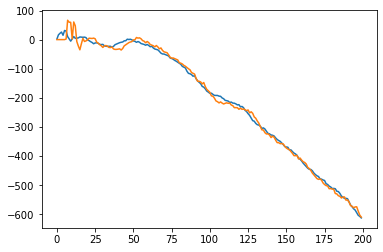

In [168]:
plt.plot(X_filt[:, 0])
plt.plot(X_extrapol[:, 0])

In [170]:
err = np.zeros(500)
xf = X_filt
for i in range(500):
    xf = kalman_filt_x(xf, X0, P0, F, Q, R, H)
    X_extrapol = np.zeros([200, 2])
    for i in range(m - 1,len(X_filt)):
        X_extrapol[i] = extrapol(X_filt[:,:][i - m + 1], m, F)
    err[i] = np.std(xf[:, 0] - X_extrapol[:, 0])

/var/folders/9y/cbn__xb93h3710lq08dsvk9r0000gn/T/ipykernel_7992/3218482949.py:45: RuntimeWarning: invalid value encountered in reciprocal
  K[i] = (P[i].dot(H.reshape(2, 1))).dot((((H.reshape(1,2)).dot(P[i])).dot(H.reshape(2, 1)) + R) ** (-1)).reshape(1, 2)


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [173]:
xf

array([   2.        ,   16.08181516,   21.43538617,   23.4406917 ,
         13.70584992,   17.64316153,   16.72039026,    5.8095681 ,
         -4.51298998,  -14.02672772,  -17.41898132,  -17.01902034,
        -18.51051563,  -19.37635084,  -19.60698198,  -18.9273172 ,
        -18.47334361,  -18.16215756,  -17.72259932,  -17.61559877,
        -18.86284737,  -20.28358389,  -21.94232278,  -23.6417435 ,
        -25.57484863,  -26.53361832,  -27.02774041,  -27.48470998,
        -28.17973377,  -28.64910182,  -28.68692808,  -29.19319986,
        -29.59607994,  -29.75286802,  -29.62956789,  -29.21867269,
        -29.06118022,  -28.26069584,  -26.52879048,  -24.47160201,
        -22.12701889,  -19.6105325 ,  -17.05892215,  -14.57101735,
        -11.73302876,   -9.123082  ,   -6.03650701,   -3.46313208,
         -1.07985264,    0.7230398 ,    1.73395597,    2.39661103,
          2.44412961,    2.82670089,    2.777686  ,    2.08234637,
          1.23073124,    0.22913276,   -1.05545643,   -1.79672

In [164]:
X_extrapol

array([[ 2.00000000e+00,  0.00000000e+00],
       [-6.54542117e+00, -2.42069068e+00],
       [-1.30147219e+00, -1.03865253e+00],
       [-1.24878359e+01, -1.30362952e+00],
       [-2.68819793e+01, -1.51282018e+00],
       [-3.16773867e+01, -1.24777165e+00],
       [-8.28737382e+00,  1.25128824e-01],
       [ 2.82364719e+00,  5.00583346e-01],
       [-1.88781986e+01, -5.58876085e-01],
       [-3.70371700e+01, -1.19723225e+00],
       [-6.32003255e+01, -1.93544693e+00],
       [-8.87463078e+01, -2.45934499e+00],
       [-1.18619418e+02, -2.99619581e+00],
       [-1.61663250e+02, -3.88312624e+00],
       [-2.11002080e+02, -4.82105728e+00],
       [-2.17591075e+02, -3.62824188e+00],
       [-2.34455432e+02, -3.25992341e+00],
       [-2.42066841e+02, -2.59259832e+00],
       [-2.87381910e+02, -3.78122572e+00],
       [-3.28383672e+02, -4.30765817e+00],
       [-3.58202050e+02, -4.29066786e+00],
       [-3.85003499e+02, -4.18783405e+00],
       [-4.14787096e+02, -4.19253336e+00],
       [-4.